<a href="https://colab.research.google.com/github/jumikao/Sentiment_Analysis_of_toxic_comments.csv/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. DATA DESCRIPTION

At the end of 2017, the Civil Comments platform shut down and chose to make their ~2m public comments from their platform available in a lasting open archive so that researchers could understand and improve civility in online conversations for years to come. Jigsaw (part of Google) sponsored this effort and extended annotation of this data by human raters for various toxic conversational attributes.

Features
Comment_text: This is the data in string format which we have to use to find the toxicity.

target: Target values which are to be predicted (has values between 0 and 1)

Data also has additional toxicity subtype attributes: (Model does not have to predict these)
severe_toxicity
obscene
threat
insult
identity_attack
sexual_explicit

Comment_text data also has identity attributes carved out from it, some of which are:
male
female
homosexual_gay_or_lesbian
christian
jewish
muslim
black
white
asian
latino
psychiatric_or_mental_illness

Apart from above features the train data also provides meta-data from jigsaw like:
toxicity_annotator_count
identity_anotator_count
article_id
funny
sad
wow
likes
disagree
publication_id
parent_id
article_id
created_date

Task description

The task is to build a model that recognizes toxicity and minimizes this type of unintended bias with respect to mentions of identities. You can proceed with one of two possible approches:

treat the problem of toxicity detection as a classification problem, where target feature with value higher than 0.5 is treated as a toxic

or try to predict exact toxicity score between 0 and 1

There are multiple possible ways of handling this task. You can go with different architectures, strategies. Try to start with something easy just to make it work, to not get stucked. Also, propose appropriate evaluation metric depends on what approach will you choose (e.g. classification, linear regression).

# 2. DATA COLLECTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

plik_df = pd.read_csv(r'/content/drive/MyDrive/toxic_comments.csv')

In [ ]:
plik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [ ]:
plik_df.head(15)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26650,approved,0,0,0,1,0,0.000000,0,4


In [ ]:
plik_df["comment_text"][4]

'haha you guys are a bunch of losers.'

In [ ]:
plik_df.count()

id                                     1804874
target                                 1804874
comment_text                           1804874
severe_toxicity                        1804874
obscene                                1804874
identity_attack                        1804874
insult                                 1804874
threat                                 1804874
asian                                   405130
atheist                                 405130
bisexual                                405130
black                                   405130
buddhist                                405130
christian                               405130
female                                  405130
heterosexual                            405130
hindu                                   405130
homosexual_gay_or_lesbian               405130
intellectual_or_learning_disability     405130
jewish                                  405130
latino                                  405130
male         

# 3. DATA CLEANING

## Columns check - "object"

In [ ]:
plik_df["created_date"].unique()  #daty są stringami

array(['2015-09-29 10:50:41.987077+00', '2015-09-29 10:50:42.870083+00',
       '2015-09-29 10:50:45.222647+00', ...,
       '2017-11-11 00:59:02.840713+00', '2017-11-11 01:01:10.153692+00',
       '2017-11-11 01:01:10.822969+00'], dtype=object)

In [ ]:
plik_df["rating"].unique()

array(['rejected', 'approved'], dtype=object)

In [ ]:
from datetime import datetime

#wyciąganie pierwszych 19 znaków z daty
date_time_str= '2015-09-29 10:50:41.987077+00'
date_time_str2= date_time_str[0:19]
date_time_str2

'2015-09-29 10:50:41'

In [ ]:
#zamiana formatu danych
date_time_object= datetime.strptime(date_time_str2, '%Y-%m-%d %H:%M:%S')
date_time_object

datetime.datetime(2015, 9, 29, 10, 50, 41)

In [ ]:
#utworzenie nowej kolumny 'short created_date' z poprawnie zapisanym formatem daty (datetime, a nie str(object))
plik_df['short created_date'] = plik_df.apply(lambda row: datetime.strptime(row['created_date'][0:19], '%Y-%m-%d %H:%M:%S'), axis=1)

In [ ]:
plik_df['short created_date'][5]

Timestamp('2015-09-29 10:50:50')

In [ ]:
plik_df.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,short created_date
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,2015-09-29 10:50:41
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,2015-09-29 10:50:42
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,2015-09-29 10:50:45
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,2015-09-29 10:50:47
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.000000,4,47,2015-09-29 10:50:48
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.009524,0,105,2015-09-29 10:50:50
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.220339,0,59,2015-09-29 10:50:52
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,2015-09-29 10:50:54
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.000000,0,4,2016-01-13 18:01:05
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,1,0,0.000000,0,4,2016-01-13 18:11:21


## Duplicates check

In [ ]:
print(any(plik_df.duplicated())) 

False


## NAN Values check

In [ ]:
print(any(plik_df.isna())) 

True


In [ ]:
#Które kolumny zawierają NaN-y? Ile jest NaN-ów?
nan_values_columns=plik_df.columns[plik_df.isna().any()].tolist()
nan_values_columns

['asian',
 'atheist',
 'bisexual',
 'black',
 'buddhist',
 'christian',
 'female',
 'heterosexual',
 'hindu',
 'homosexual_gay_or_lesbian',
 'intellectual_or_learning_disability',
 'jewish',
 'latino',
 'male',
 'muslim',
 'other_disability',
 'other_gender',
 'other_race_or_ethnicity',
 'other_religion',
 'other_sexual_orientation',
 'physical_disability',
 'psychiatric_or_mental_illness',
 'transgender',
 'white',
 'parent_id']

In [ ]:
plik_df.count()

id                                     1804874
target                                 1804874
comment_text                           1804874
severe_toxicity                        1804874
obscene                                1804874
identity_attack                        1804874
insult                                 1804874
threat                                 1804874
asian                                   405130
atheist                                 405130
bisexual                                405130
black                                   405130
buddhist                                405130
christian                               405130
female                                  405130
heterosexual                            405130
hindu                                   405130
homosexual_gay_or_lesbian               405130
intellectual_or_learning_disability     405130
jewish                                  405130
latino                                  405130
male         

In [ ]:
#NaNy występują jako brak podania wartości dla danej kolumny. Ponieważ większość kolumn przyjmuje klucz: 0-brak wartości, 1-wartość istnieje, uzupełniamy NaNy zerami.

df=plik_df.fillna(0)

In [ ]:
#df.head(15)

In [ ]:
#df.count()       #1804874 records for each column

# 4. DATA ENGINEERING

# One-hot encoding dla kolumny "rating"

In [ ]:
#one-hot encoding stwarza kolumnę 'rating-encode' z danymi dla kolumny 'rating' w formacie liczbowym 
#rejected-1, approved-0

lista=[]
for i in range(len(df)):
  if df['rating'][i]=="rejected":
    lista.append(1)
  else:
    lista.append(0)
df['rating_encode']=lista

In [ ]:
#df.head()

In [ ]:
df['rating'][4]

'rejected'

In [ ]:
df['rating_encode'][4]

1

# Sprawdzenie korelacji i wybór zmiennych do df

In [ ]:
#liczenie korelacji między zmiennymi - count_corr
count_corr=df.corr()

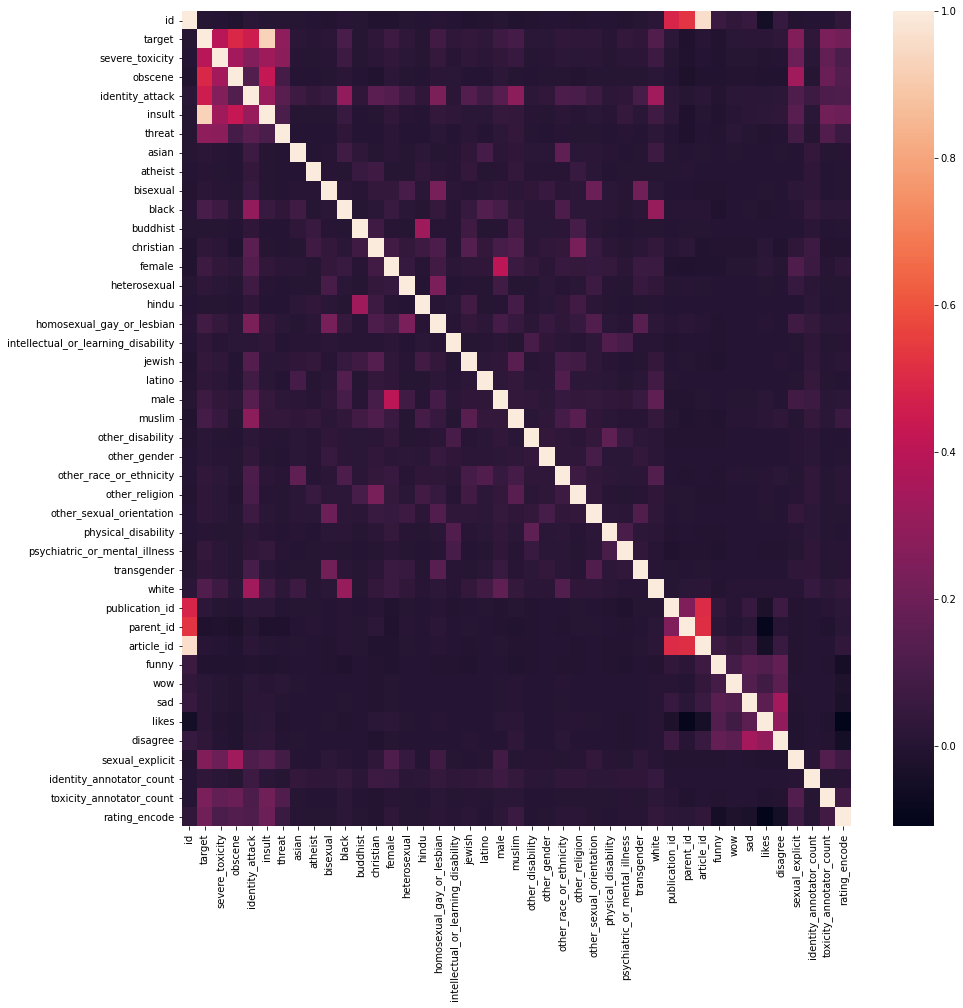

In [ ]:
#heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(count_corr)

In [ ]:
#występuje wysoka korelacja "target" z:
# severe_toxicity
# obscene
# identity_attack
# insult
# threat
# identity_annotator_count
# toxicity_annotator_count
# sexual_explicit
# te kolumny będące gotowym rozwiązaniem usuwamy na potrzeby tej pracy.  

Przygotowanie tabeli do treningu danych z pominięciem niepotrzebnych kolumn

In [ ]:
#usuwanie niepotrzebnych kolumn
df=df.drop(columns=['severe_toxicity','obscene','identity_attack','insult','threat','identity_annotator_count','toxicity_annotator_count','rating','created_date','sexual_explicit'])

In [ ]:
df.head()

,id,target,comment_text,asian,atheist,bisexual,black,buddhist,christian,female,...,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,short created_date,rating_encode
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,0,0,2015-09-29 10:50:41,1
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,0,0,2015-09-29 10:50:42,1
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,0,0,2015-09-29 10:50:45,1
3,59855,0.000000,Is this something I'll be able to install on m...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,0,0,2015-09-29 10:50:47,1
4,59856,0.893617,haha you guys are a bunch of losers.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,1,0,2015-09-29 10:50:48,1


# Sprawdzenie, czy zbiór jest zbalansowany (hejt/nie-hejt)

In [ ]:
rejected_comments=df[df['rating_encode']==1]  

#rejected_comments.info()
rejected_comments_number=120116

In [ ]:
rejected_comments


,id,target,comment_text,asian,atheist,bisexual,black,buddhist,christian,female,...,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,short created_date,rating_encode
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,0,0,2015-09-29 10:50:41,1
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,0,0,2015-09-29 10:50:42,1
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,0,0,2015-09-29 10:50:45,1
3,59855,0.000000,Is this something I'll be able to install on m...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,0,0,2015-09-29 10:50:47,1
4,59856,0.893617,haha you guys are a bunch of losers.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,2006,0,0,0,1,0,2015-09-29 10:50:48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804796,6333791,0.166667,"Look at the socks. What is he, five?",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54,0.0,399287,0,0,0,0,0,2017-11-11 00:27:46,1
1804797,6333792,0.000000,Find this guy. http://www.crazydaysandnights.n...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54,0.0,394068,0,0,0,0,0,2017-11-11 00:26:01,1
1804806,6333814,0.000000,Not a shred of evidence so far in this witch h...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54,0.0,399536,0,0,0,0,0,2017-11-11 00:30:15,1
1804821,6333836,0.000000,You sure love your youtubes...and voting for y...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54,6278354.0,394068,0,0,0,0,0,2017-11-11 00:33:13,1


In [ ]:
approved_comments=df[df['rating_encode']==0]
#approved_comments.info()
approved_comments_number=1684758

In [ ]:
print("Liczba hejtów: ", len(df[df['rating_encode']==1]  ), "vs", "Liczba nie-hejtów :", len(df[df['rating_encode']==0]  ) )

Liczba hejtów:  120116 vs Liczba nie-hejtów : 1684758


Zbiór nie jest zbalansowany. Należy zoptymalizować zbiór do analizy na 50/50. W tym celu wybieramy 120 116 nie-hejtów komentarzy do analizy (approved_comments)

In [ ]:
approved_comments=df[df['rating_encode']==0]

approved_comments.reset_index(drop=True, inplace=True)                              #resetowanie indeksów w tabeli

approved_comments=approved_comments.drop(approved_comments.loc[120116:].index)      #usuwamy komentarze od numeru 120116 i wyżej 

len(approved_comments)

120116

In [ ]:
balanced_df= rejected_comments.append(approved_comments)
len(balanced_df)

240232

In [ ]:
#Przetasowanie wierszy w tabeli (na potrzeby późniejszego train/test split)
from sklearn.utils import shuffle

balanced_df = shuffle(balanced_df)

balanced_df.reset_index(drop=True, inplace=True)

balanced_df.head()

,id,target,comment_text,asian,atheist,bisexual,black,buddhist,christian,female,...,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,short created_date,rating_encode
0,585691,0.3,Wait'll Trump grabs you by the p___y.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,585645.0,151042,0,0,0,0,0,2016-11-09 07:06:59,1
1,366690,0.4,The law in Oregon makes it a lot easier. If th...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,366242.0,140043,0,0,0,0,0,2016-06-27 20:42:10,0
2,1041257,0.0,Sophistry Dermot Sophistry; u r better than that.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,1040873.0,314624,0,0,0,0,0,2017-02-24 20:28:56,1
3,6265824,0.4,"""Meanwhile, the real America and Catholics lov...",0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,53,6265203.0,395749,0,0,0,0,0,2017-11-01 15:18:11,1
4,578380,0.0,"just for a second, imagine Alaska without the ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,0.0,150454,0,0,0,0,0,2016-11-05 17:21:41,1


# Pre-processing

In [ ]:
import nltk.corpus
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Normalizacja tekstu

Text Normalization may include the following actions:
- latter change to lower case
- removing numbers
- stemming
- lemmization
- removing whitespaces
- removing stop words
- acronyms look up
- emoticons identification
- and other.

Utworzenie kolumny 'comments_changed', dla której będą wprowadzane zmiany na komentarzach (kolumn bazowa 'comment_text' bez zmian)

In [ ]:
balanced_df['comments_changed'] = balanced_df.apply(lambda row: (row['comment_text']), axis=1)

balanced_df['comments_changed'][0]

"Wait'll Trump grabs you by the p___y."

### Tokenizacja słów

In [ ]:
#- tokenizacja słów
#-zmiana wielkości liter na małe
#-usunięcie znaków interpunkcyjnych
#-usunięcie stopwords

In [ ]:
balanced_df['comment_text'][0]

"Wait'll Trump grabs you by the p___y."

In [ ]:
#tokenizacja tekstu
word_tokenize(balanced_df['comment_text'][0])

['Wait', "'ll", 'Trump', 'grabs', 'you', 'by', 'the', 'p___y', '.']

In [ ]:
#tokenizacja tekstu, zamiana liter na małe, usunięcie stopwords
tokenized_comment=[word for word in word_tokenize(balanced_df['comment_text'][0]) if word.lower() not in stopwords.words("english")]
tokenized_comment

['Wait', "'ll", 'Trump', 'grabs', 'p___y', '.']

### Punctuations

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tokenized_punct_comment=" ".join([char for char in tokenized_comment if char not in string.punctuation])      #char- character - znak
tokenized_punct_comment

"Wait 'll Trump grabs p___y"

In [ ]:
#Replace all acronyms with their translation 
# https://betterprogramming.pub/twitter-sentiment-analysis-using-naive-bayes-and-n-gram-5df42ae4bfc6

# acronyms = pd.read_csv('data/acronyms.csv')
# acronyms.tail(5)

In [ ]:
#An emoticon dictionary regrouping 132 of the most used emoticons in western with their sentiment, negative or positive
# https://betterprogramming.pub/twitter-sentiment-analysis-using-naive-bayes-and-n-gram-5df42ae4bfc6

# emoticons = pd.read_csv('data/smileys.csv')
# positive_emoticons = emoticons[emoticons.Sentiment == 1]
# negative_emoticons = emoticons[emoticons.Sentiment == 0]
# emoticons.head(5)

### Lematyzacja tekstu

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

print([[wordnet_lemmatizer.lemmatize(word) for word in word_tokenize(sent)] for sent in sent_tokenize(tokenized_punct_comment)])

[['Wait', "'ll", 'Trump', 'grab', 'p___y']]


## Definicja funkcji text_normalise

In [ ]:
#połączenie w ciąg zadań wszystkich elementów przedstawionych powyżej i wykonanie funkcji dla całej kolumny 'comments_changed'

def text_normalise(row):
  
  comment=row['comment_text']
    
  comment=[word for word in word_tokenize(comment) if word.lower() not in stopwords.words("english")]     #tokenizer, lower, stopwords
  
  comment=" ".join([char for char in comment if char not in string.punctuation])                        #punctuation
    
  comment=[wordnet_lemmatizer.lemmatize(word) for word in word_tokenize(comment)]                       #lemmatizer -zmiana do f-kcij lematyzacji wyżej
                                                                                                         
  comment=" ".join([char for char in comment])                                                          #dodane, aby wyjść z listy do stringa

  return comment

In [ ]:
balanced_df['comments_changed'] = balanced_df.apply(text_normalise, axis=1)

In [ ]:
balanced_df.head()

,id,target,comment_text,asian,atheist,bisexual,black,buddhist,christian,female,...,parent_id,article_id,funny,wow,sad,likes,disagree,short created_date,rating_encode,comments_changed
0,585691,0.3,Wait'll Trump grabs you by the p___y.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,585645.0,151042,0,0,0,0,0,2016-11-09 07:06:59,1,Wait 'll Trump grab p___y
1,366690,0.4,The law in Oregon makes it a lot easier. If th...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,366242.0,140043,0,0,0,0,0,2016-06-27 20:42:10,0,law Oregon make lot easier house shoot dead qu...
2,1041257,0.0,Sophistry Dermot Sophistry; u r better than that.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1040873.0,314624,0,0,0,0,0,2017-02-24 20:28:56,1,Sophistry Dermot Sophistry u r better
3,6265824,0.4,"""Meanwhile, the real America and Catholics lov...",0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,6265203.0,395749,0,0,0,0,0,2017-11-01 15:18:11,1,`` Meanwhile real America Catholics love presi...
4,578380,0.0,"just for a second, imagine Alaska without the ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,150454,0,0,0,0,0,2016-11-05 17:21:41,1,second imagine Alaska without eskimoes problem...


In [ ]:
balanced_df.columns

Index(['id', 'target', 'comment_text', 'asian', 'atheist', 'bisexual', 'black',
       'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white',
       'publication_id', 'parent_id', 'article_id', 'funny', 'wow', 'sad',
       'likes', 'disagree', 'short created_date', 'rating_encode',
       'comments_changed'],
      dtype='object')

In [ ]:
balanced_df

,id,target,comment_text,asian,atheist,bisexual,black,buddhist,christian,female,...,parent_id,article_id,funny,wow,sad,likes,disagree,short created_date,rating_encode,comments_changed
0,585691,0.3,Wait'll Trump grabs you by the p___y.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,585645.0,151042,0,0,0,0,0,2016-11-09 07:06:59,1,Wait 'll Trump grab p___y
1,366690,0.4,The law in Oregon makes it a lot easier. If th...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,366242.0,140043,0,0,0,0,0,2016-06-27 20:42:10,0,law Oregon make lot easier house shoot dead qu...
2,1041257,0.0,Sophistry Dermot Sophistry; u r better than that.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1040873.0,314624,0,0,0,0,0,2017-02-24 20:28:56,1,Sophistry Dermot Sophistry u r better
3,6265824,0.4,"""Meanwhile, the real America and Catholics lov...",0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,6265203.0,395749,0,0,0,0,0,2017-11-01 15:18:11,1,`` Meanwhile real America Catholics love presi...
4,578380,0.0,"just for a second, imagine Alaska without the ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,150454,0,0,0,0,0,2016-11-05 17:21:41,1,second imagine Alaska without eskimoes problem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240227,309235,0.0,"I see the typical Government ""Do Gooders"" -- a...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,98775,0,0,0,1,0,2016-05-10 00:26:36,0,see typical Government `` Gooders `` -- foamin...
240228,250737,0.0,The sign carried by Bundy's wife says that the...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,46566,0,0,0,3,0,2016-03-11 22:24:50,0,sign carried Bundy 's wife say land belongs ``...
240229,758109,0.5,"Mr. Dawson, you are truly deplorable and have ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,158537,0,0,0,0,0,2016-12-27 03:11:22,1,Mr. Dawson truly deplorable concept history Re...
240230,385758,0.0,They are taught by people who were taught by p...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,385752.0,141279,0,0,0,8,0,2016-07-13 06:17:18,0,taught people taught people etc lot time n't e...


## Tworzenie tabeli z danymi, na podstawie których chcemy docelowo uczyć model 

In [ ]:
X_balanced_df=balanced_df.drop(columns=['id'])

In [ ]:
X_balanced_df=balanced_df.drop(columns=['comment_text'])

In [ ]:
X_balanced_df.reset_index(inplace=True)

In [ ]:
X_balanced_df

,index,id,target,asian,atheist,bisexual,black,buddhist,christian,female,...,parent_id,article_id,funny,wow,sad,likes,disagree,short created_date,rating_encode,comments_changed
0,0,585691,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,585645.0,151042,0,0,0,0,0,2016-11-09 07:06:59,1,Wait 'll Trump grab p___y
1,1,366690,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,366242.0,140043,0,0,0,0,0,2016-06-27 20:42:10,0,law Oregon make lot easier house shoot dead qu...
2,2,1041257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1040873.0,314624,0,0,0,0,0,2017-02-24 20:28:56,1,Sophistry Dermot Sophistry u r better
3,3,6265824,0.4,0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,6265203.0,395749,0,0,0,0,0,2017-11-01 15:18:11,1,`` Meanwhile real America Catholics love presi...
4,4,578380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,150454,0,0,0,0,0,2016-11-05 17:21:41,1,second imagine Alaska without eskimoes problem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240227,240227,309235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,98775,0,0,0,1,0,2016-05-10 00:26:36,0,see typical Government `` Gooders `` -- foamin...
240228,240228,250737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,46566,0,0,0,3,0,2016-03-11 22:24:50,0,sign carried Bundy 's wife say land belongs ``...
240229,240229,758109,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,158537,0,0,0,0,0,2016-12-27 03:11:22,1,Mr. Dawson truly deplorable concept history Re...
240230,240230,385758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,385752.0,141279,0,0,0,8,0,2016-07-13 06:17:18,0,taught people taught people etc lot time n't e...


# Feature Engineering

Feature Engineering
	- TFIDFVec
	- Word2Vec

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(balanced_df['comments_changed'])

In [ ]:
X.shape

(240232, 105916)

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., '𝙮𝙚𝙖𝙧𝙨', '𝟔𝟎𝟎', '𝟭𝟭𝟰'], dtype=object)

In [ ]:
X2= X_balanced_df

In [ ]:
X2.shape

(240232, 38)

## Embeddings

In [ ]:
# !pip install gensim==4.1.2
# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec

# model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)        #vector_size lub size , zależy od biblioteki nowszej starszej
# model.build_vocab(sentences)

# model.train(sentences,total_examples=model.corpus_count, epochs=10)
# model.save("word2vec.model")


# MODELLING

Problem do rozwiązania: Czy dany tekst jest hejtem, czy nie jest hejtem (0-1)? 

Rozwiązanie:
- przewidywanie za pomocą regresji liniowej
- przewidywanie za pomocą drzew decyzjnych

## Train/Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= X     

y= X_balanced_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x

<240232x105916 sparse matrix of type '<class 'numpy.float64'>'
	with 5456930 stored elements in Compressed Sparse Row format>

In [ ]:
y

0         0.3
1         0.4
2         0.0
3         0.4
4         0.0
         ... 
240227    0.0
240228    0.0
240229    0.5
240230    0.0
240231    0.0
Name: target, Length: 240232, dtype: float64

In [ ]:
print("średnia ważona z y:",y.mean(), ",", "Odchylenie standardowe z y: ", y.std())

średnia ważona z y: 0.17062874416948998 , Odchylenie standardowe z y:  0.258144171778021


## Regresja liniowa model liniowy

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

In [ ]:
print('RMSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred, squared=False),  
        mean_squared_error(y_test, y_test_pred, squared=False)))  


RMSE na próbkach uczących: 0.122, testowych: 0.222


In [ ]:
print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Współczynnik R^2 dla danych uczących: 0.777, testowych: 0.263


## Regresja liniowa model Lasso z CV

In [ ]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lasso = linear_model.Lasso(alpha=0.1)

lasso.fit(x_train, y_train)

y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

In [ ]:
print(cross_val_score(lasso, x, y, cv=5))

[-6.11354651e-05 -8.20222569e-07 -4.32214219e-06 -5.64673683e-07
 -1.63935468e-05]


In [ ]:
#jak zinterpretować ten wynik cross val score? Co on znaczy? Czy do tego też zastosować RMSE, r^2?

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regr_tree1 = DecisionTreeRegressor(max_depth=2)
regr_tree2 = DecisionTreeRegressor(max_depth=5)

regr_tree1.fit(x_train, y_train)
regr_tree2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_train_pred1 = regr_tree1.predict(x_test)
y_train_pred2 = regr_tree2.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt

ValueError: ignored

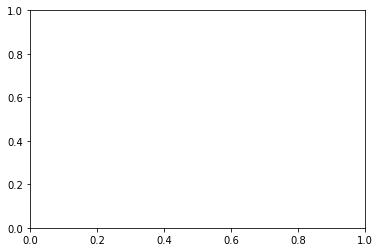

In [ ]:
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_train_pred1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test, y_train_pred2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)

cross_val_score(regressor, x, y, cv=3)

In [ ]:
#jak zinterpretować ten wynik cross val score? co on znaczy?